Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
391/391 - 93s - 238ms/step - accuracy: 0.7565 - loss: 0.5000 - val_accuracy: 0.8370 - val_loss: 0.3796
Epoch 2/5
391/391 - 89s - 228ms/step - accuracy: 0.8785 - loss: 0.2946 - val_accuracy: 0.8521 - val_loss: 0.3502
Epoch 3/5
391/391 - 95s - 243ms/step - accuracy: 0.9173 - loss: 0.2211 - val_accuracy: 0.8646 - val_loss: 0.3809
Epoch 4/5
391/391 - 89s - 226ms/step - accuracy: 0.9360 - loss: 0.1746 - val_accuracy: 0.8571 - val_loss: 0.3755
Epoch 5/5
391/391 - 85s - 217ms/step - accuracy: 0.9501 - loss: 0.1416 - val_accuracy: 0.8586 - val_loss: 0.3790
782/782 - 33s - 42ms/step - accuracy: 0.8586 - loss: 0.3790

Test Accuracy: 0.8586


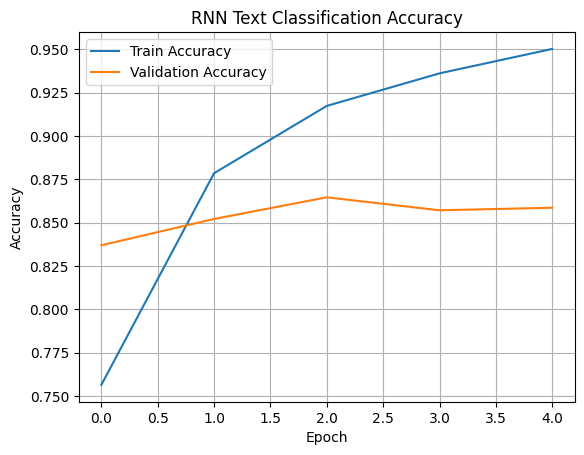

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# Load the IMDB dataset
vocab_size = 10000       # Use top 10,000 words
max_length = 200         # Max review length (truncate/pad to this size)

(x_train, y_train), (x_test, y_test) = keras.datasets.imdb.load_data(num_words=vocab_size)

# Pad sequences to ensure equal input length
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=max_length)
x_test = keras.preprocessing.sequence.pad_sequences(x_test, maxlen=max_length)

# Define the RNN model using LSTM
model = keras.Sequential([
    keras.layers.Embedding(input_dim=vocab_size, output_dim=32, input_length=max_length),
    keras.layers.LSTM(64, return_sequences=True),  # First LSTM layer
    keras.layers.LSTM(32),                         # Second LSTM layer
    keras.layers.Dense(1, activation='sigmoid')    # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Print the model architecture
model.summary()

# Train the model
history = model.fit(x_train, y_train,
                    epochs=5,
                    batch_size=64,
                    validation_data=(x_test, y_test),
                    verbose=2)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest Accuracy: {test_acc:.4f}')


#optional:

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('RNN Text Classification Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
